<a href="https://colab.research.google.com/github/ealeongomez/Machine-Learning/blob/main/Cla_SVM_minist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**

In [10]:
# Basic libraries 
import matplotlib as mlp 
import matplotlib.pyplot as plt
import random
import numpy as np

# Load data
from sklearn.datasets import fetch_openml

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Performace metrics 
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#**Load data**

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']

X.shape, y.shape

((70000, 784), (70000,))

In [6]:
type(y[0])

str

In [7]:
y.astype(int)

array([5, 0, 4, ..., 4, 5, 6])

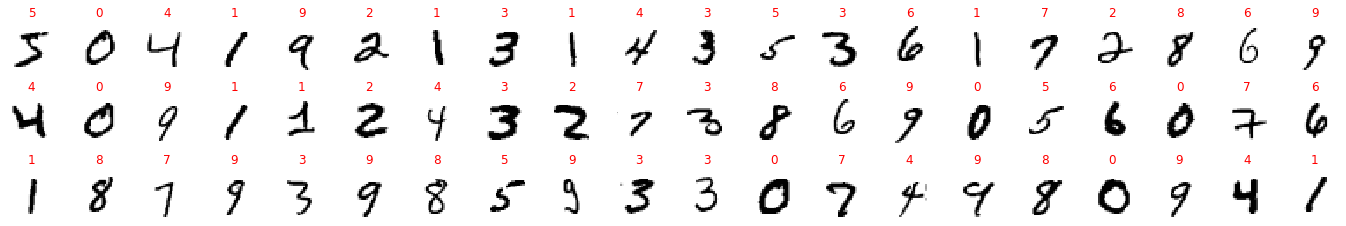

In [8]:
n_rows = 3
n_cols = 20
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X[index].reshape(28,28), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y[index], fontsize=12, c='r')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [11]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)

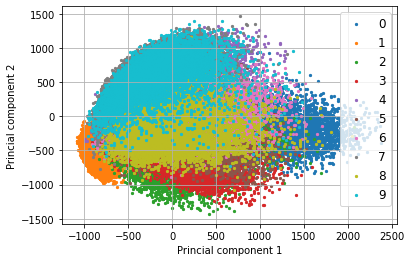

In [29]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for l, c in zip(np.unique(y), colors):
  plt.scatter(X_PCA[y==l, 0], X_PCA[y==l, 1], c=c, label=l, s=5)

plt.xlabel('Princial component 1')
plt.ylabel('Princial component 2')
plt.legend(prop={'size': 12})
plt.grid()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49000, 784), (21000, 784), (49000,), (21000,))

#**SVM**

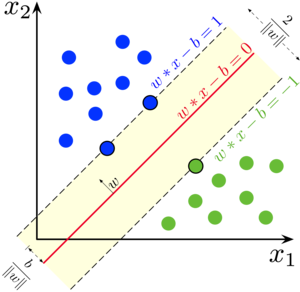

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

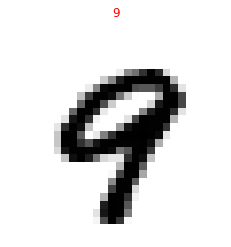

In [ ]:
number = random.randint(0, X_test.shape[0])

plt.imshow(X_test[number].reshape(28,28), cmap="binary", interpolation="nearest")
plt.axis('off')
plt.title(y_test[number], fontsize=12, c='r')
plt.show()

In [ ]:
svm_clf.predict([X_test[number]])


array(['9'], dtype=object)

In [ ]:
some_digit_scores = svm_clf.decision_function([X_test[number]])

print(some_digit_scores)

[[ 1.71085028 -0.31014427  3.7424589   4.98639283  8.29680634  2.73043743
   0.70160995  6.23970602  7.28567354  9.31703009]]


In [ ]:
np.argmax(some_digit_scores)

9

In [ ]:
y_pred = svm_clf.predict(X_test)

In [ ]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[2035,    1,    3,    0,    1,    4,    8,    2,    4,    0],
       [   0, 2344,    8,    4,    1,    0,    0,    4,    2,    1],
       [   2,    5, 2083,    5,    5,    4,    6,   13,    8,    2],
       [   2,    2,   19, 2104,    2,   15,    1,   13,   12,    6],
       [   2,    4,    3,    0, 1894,    0,    4,    6,    2,   21],
       [   3,    1,    2,   19,    4, 1861,   15,    1,    8,    1],
       [   1,    2,    0,    0,    5,    7, 2070,    0,    3,    0],
       [   2,    8,   18,    3,   12,    2,    0, 2184,    2,   17],
       [   3,   10,   10,   15,    7,    9,    9,    5, 1918,    6],
       [  12,   10,    3,   10,   22,    2,    0,   17,    5, 2009]])

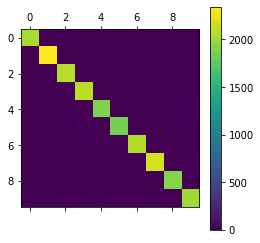

In [ ]:
plt.matshow(conf_mx)
plt.colorbar()
plt.show()